In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import bigrams
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

In [2]:
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=15)

# Exploratory Analysis
## Data Processing and Cleaning
This will further clean the labelled dataset to get ready for exploratory analysis.<br/>
Steps include:
<ol>
    <li>Tokenize text into words.</li>
    <li>Make all words lowercase.</li>
    <li>Remove punctuation and stopwords.</li>
</ol>

Future steps will be taken when getting ready for machine learning, including splitting data into test and train sets. 

In [3]:
endometriosis_sub_posts = pd.read_csv('../data/endometriosis_sub_data.csv')
endometriosis_com_posts = pd.read_csv('../data/endometriosis_comment_data.csv')
endo_sub_posts = pd.read_csv('../data/Endo_sub_data.csv')
endo_com_posts = pd.read_csv('../data/Endo_comment_data.csv')
endo_posts = pd.concat([endometriosis_sub_posts, endometriosis_com_posts, endo_sub_posts, endo_com_posts])
endo_posts = endo_posts.loc[~endo_posts['text'].isna()].reset_index(drop=True)

pcos_sub_posts = pd.read_csv('../data/PCOS_sub_data.csv')
pcos_com_posts = pd.read_csv('../data/PCOS_comment_data.csv')
pcos_posts = pd.concat([pcos_sub_posts, pcos_com_posts])
pcos_posts = pcos_posts.loc[~pcos_posts['text'].isna()].reset_index(drop=True)

In [4]:
stop_words = stopwords.words('english')
stop_words.extend(list(STOPWORDS))
more_stopwords = ['endo','endometriosis','pcos','polycystic','also','one','time','even','symptom','symptoms','know',
                  'like','think','though','really','would','still','going','thing','doctor','get',"i'm","i've",'said',
                  'want','told','could','thought','lot','that','since','say','thank']
stop_words.extend(more_stopwords)
stop_words = set(stop_words)

In [5]:
print('There are %d endometriosis-related posts.' %len(endo_posts))
print('There are %d PCOS-related posts.' %len(pcos_posts))

There are 39464 endometriosis-related posts.
There are 37204 PCOS-related posts.


Some examples of endometriosis texts are:  
<ul>
    <li>"Lost 2 jobs because of endo. The pain is one thing and the fatigue is another. It sucks. I loved my job too. Considering a work from home job to see if I can kickstart my career again."</li>
    <li>"My symptoms are unusual? Hi everybody,  I finally went yesterday to get a second opinion about my endo and adeno from the recommended expert in my country. He was quite nice, except for interrupting me all the time and talking more than listening. But I feel that this is a normal problem with doctors.  He said that my symptoms are unusual and I don't understand why, but I couldn't ask him. I wanted your opinion as endo warriors and experts.  **I have:**   Daily pain (moderate to high) in the uterus, lower back pain, left ovary, head, knees and breasts. It used to be only during my periods but now is all the time.  Intense pain during penetration, cramps after orgasm and low pain while aroused. I don't have sex now for obvious reasons.  Dizziness, nausea, 'motion sickness' (similar to motion sickness but experienced while sitting in the sofa/chair). Problems while pooing (as if the poo isn't aiming correctly to the anus) and pain when 'I need to go'. I used to have diarrhoea while in my period.  Extreme fatigue, to the point that cleaning the living room+kitchen last week made me be the next 8 hours shaking in the sofa from the weakness and pain. I suspect that I might have Cfs.  Extremely intense periods (when I had them normally). The last years I had two weeks of spotting + one week of real period. But this is probably due to adenomyosis not endo.  **I dont have:** (He asked me)  Leg pain or pain during urination.  **Background:** 30yo woman with endometriosis (stage 2, he said 'deep endometriosis but I dont know if they are the same), adenomyosis and depression. Possible cfs (I am going to the neuro for that).  What are your opinios, ladies? :)"</li>
    <li>"pain with exercise sucks Need to rant... I just ran two and a half miles and was feeling awesome, but now I have horrible back and pelvic pain. Thinking about how when I’d complain about my pain to my ex he’d say, “why don’t you try exercising?” lol.... it’s annoying because I’m in pretty good physical shape and love being active. I could do even more if endo pain didn’t stop me."</li>
</ul>

Some examples of no endometriosis (or PCOS) texts are:  
<ul>
    <li>"Best waxing home kit for facial hair due to PCOS ? I was wondering what are some of the best waxing kits for coarse dark facial hair from having PCOS ? I can’t do laser hair again due to corona virus and honestly it hurts so much and found it actually made some facial hair areas worse????? (Has anyone else had this issue?) so I’m looking to wax !! I have been shaving and it’s leaving bumps and it hurts to shave everyday 😭😭"</li>
    <li>"I am at a loss here. When I say “I don’t want to take medicine for this!” What goes through the doctor’s mind that they say “I suggest contraceptives. There’s no other option out there.” ??? First time poster here!  About a year ago I began having irregular periods. I changed my birth control and didn’t have a period for three months, so I stopped taking it. I had three regular periods, all 5 days in length, 32 days apart. Before bc it was this exact cycle for me. Then come November 2019, nothing. December, nothing. My last natural period was Oct. 21 2019. During this time my face was breaking out baddd, I could not sleep, my hair was growing faster and thicker and in different places. I didn’t know what was going on. I was gaining weight slowly.   So I treated my acne and went to the OBGYN. They did all sorts of tests. I came back cyst free, regular insulin and all. Except I had high testosterone levels and DHEA’s. OBGYN said I need to consult a endocrinologist to sort out my imbalance of hormones. At the same time, the Dermatologist prescribed me Spiralacdone (or something like that). They said there were bad side effects, so I haven’t taken it yet. I also was prescribed Progesterone for 10 days and got a 10 day heavy bleed.   So I finally went to the endocrinologist today. She diagnosed me with PCOS for sure. She told me I must go back on contraceptives and take my Spiralacdone if I want to be regular. Even after I asked for other options other than a pill, she said there were no other options.   I asked what happens if I take the contraceptives for two years or so, then want to have a baby so I go off of them and this same thing happens, What do I do? She said she would put me on Metforim and BC AND spiralacdone. Like what the heck? I said I don’t want to take pills. I want to eventually have a baby... I know the chances are low with an irregular period. Why wouldn’t she try to help me more? I want to have a period and normal estrogen without pills.   I asked about keto and She said keto is only for obese women. What the heck? I wasted my time going there. I mean what else could I do? I am at a loss."</li>
    <li>"Just been diagnosed aged 30 and TTC I’m new here. I just had an ultrasound after having fertility issues which showed I have PCOS. I’m not really sure how to feel about it but thought this would be a safe space to come.   My ovaries are 50% and 75% larger than average. Not had a period for more than 100 days and really struggling to wrap my head around what this means for us.   Just thought I’d reach out in case anyone is in the same situation ❤️"</li>
</ul>

In [6]:
def join_all_posts(text_df):
    return ''.join(text_df['text'].values.tolist())

def tokenize_and_filter(text):
    words = word_tokenize(text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    filtered_words = [word for word in filtered_words if word.isalpha()]
    return filtered_words
    
def get_word_frequencies(words):
    counts = Counter(words)
    return counts

In [7]:
endo_text = join_all_posts(endo_posts)
endo_words = tokenize_and_filter(endo_text)
endo_counts = get_word_frequencies(endo_words)

In [8]:
pcos_text = join_all_posts(pcos_posts)
pcos_words = tokenize_and_filter(pcos_text)
pcos_counts = get_word_frequencies(pcos_words)

### Most Common Words

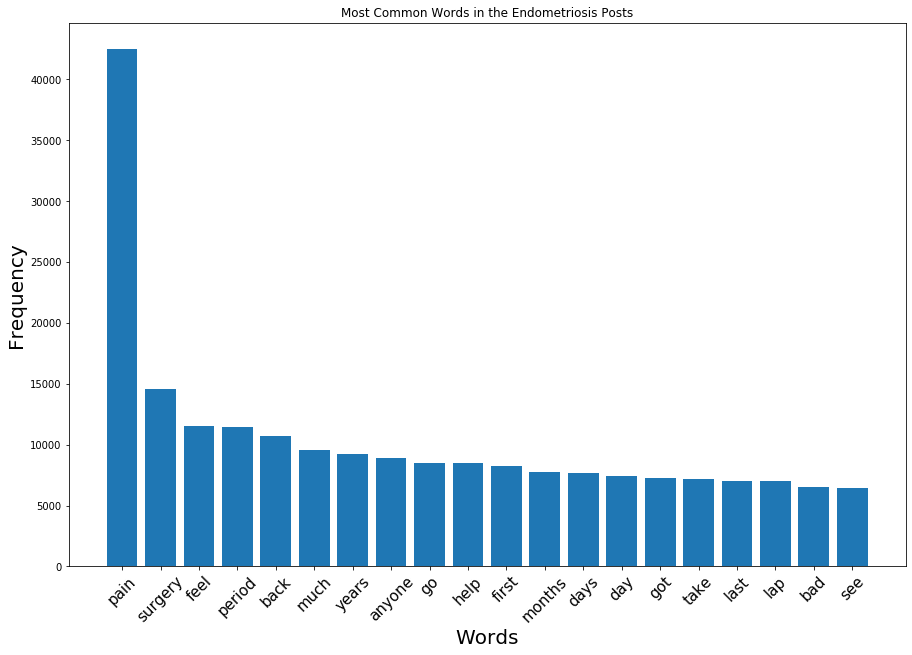

In [9]:
most_common = dict(endo_counts.most_common(20))

plt.figure(figsize = (15,10))
plt.bar(most_common.keys(), most_common.values())
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in the Endometriosis Posts')
plt.savefig('../results/images/most_common_endo.png', bbox_inches='tight')
plt.show()

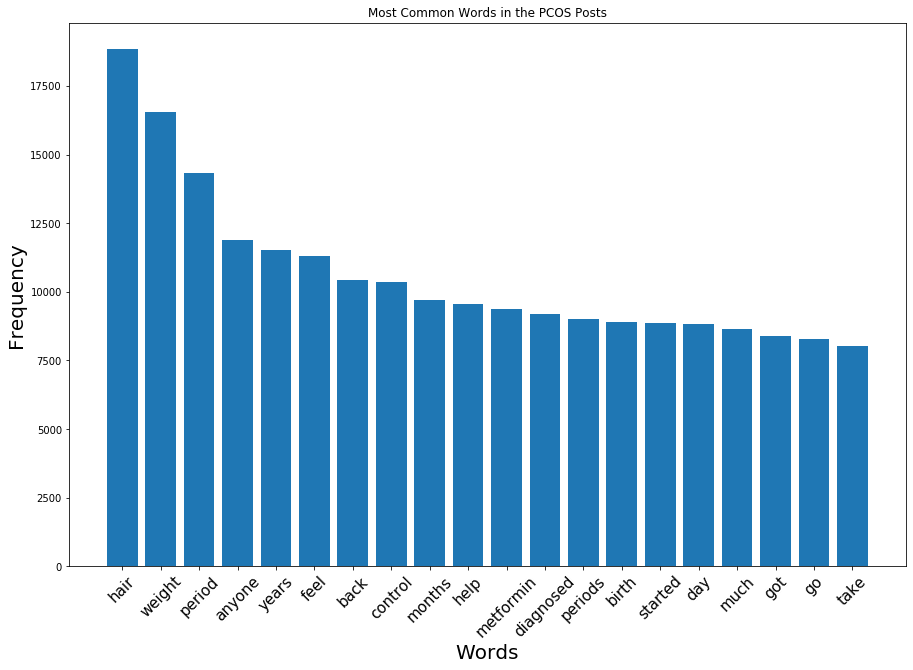

In [10]:
most_common = dict(pcos_counts.most_common(20))

plt.figure(figsize = (15,10))
plt.bar(most_common.keys(), most_common.values())
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in the PCOS Posts')
plt.savefig('../results/images/most_common_pcos.png', bbox_inches='tight')
plt.show()

The endometriosis posts are dominated by the word "pain." However, the PCOS posts have less of a gap between their first and second most common words. The words seen are those expected, as women with endometriosis suffer from debilitating pain and often have surgery. Women with PCOS experience hair loss and weight gain more often.

### Length of Posts

In [11]:
endo_len = [len(post) for post in endo_posts['text'].values]
pcos_len = [len(post) for post in pcos_posts['text'].values]

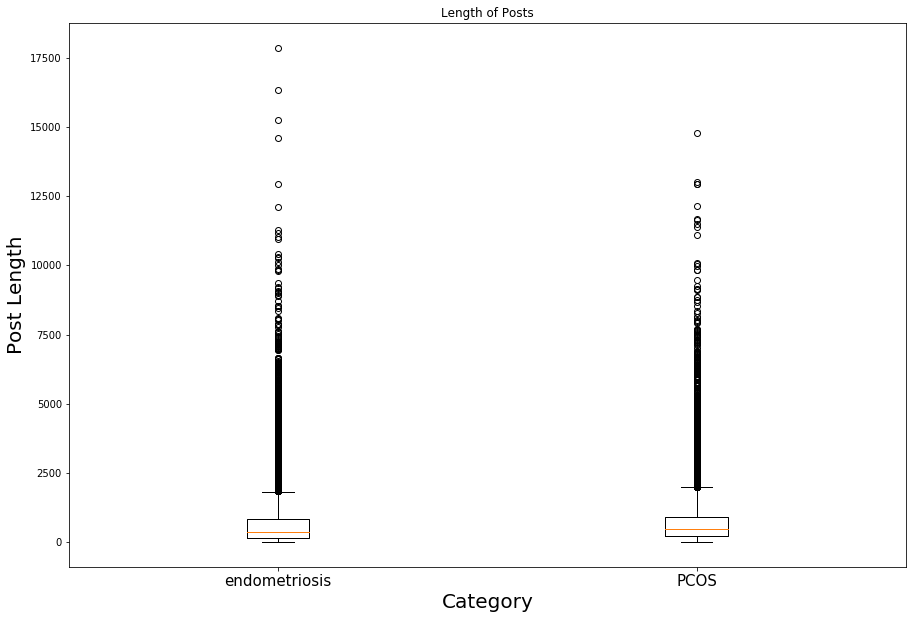

In [12]:
lengths = np.array([endo_len,pcos_len])
plt.figure(figsize = (15,10))
plt.boxplot(lengths)
plt.xticks(ticks=[1,2], labels=['endometriosis','PCOS'])
plt.xlabel('Category')
plt.ylabel('Post Length')
plt.title('Length of Posts')
plt.savefig('../results/images/post_lengths.png', bbox_inches='tight')
plt.show()

The lengths of the posts are very similar between each category.

### Word Cloud

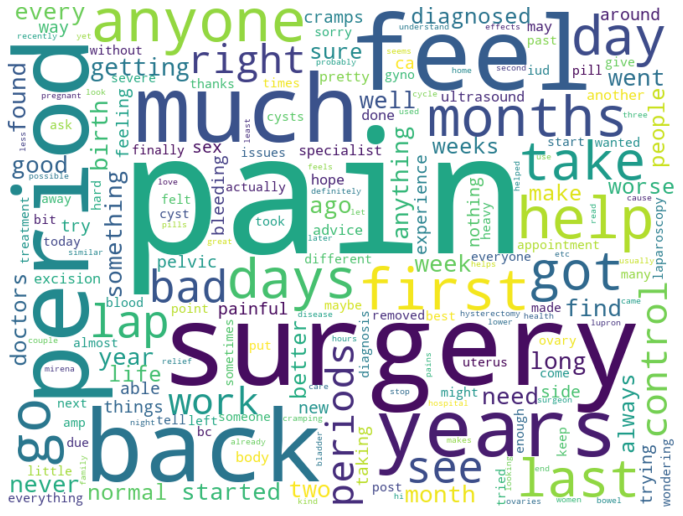

In [13]:
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=600)
wordcloud.generate_from_frequencies(endo_counts)
wordcloud.to_file('../results/images/endo_word_cloud.png')
plt.figure(figsize=(12, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

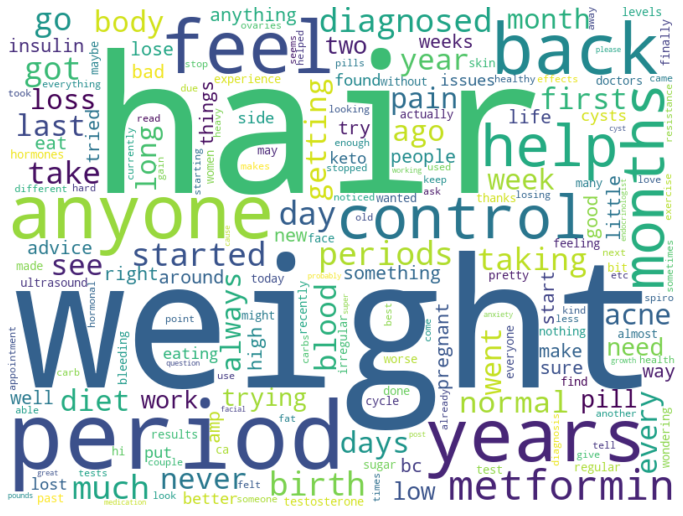

In [14]:
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=600)
wordcloud.generate_from_frequencies(pcos_counts)
wordcloud.to_file('../results/images/pcos_word_cloud.png')
plt.figure(figsize=(12, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()